## TESTING THE MODEL

In [1]:
#imports
import pandas as pd


In [2]:
df = pd.read_excel(
    r"C:\Users\hp\Desktop\4th sem\AI_Training\Projects\Udaai_adhaar\data\processed\test_cleaned_final.xlsx"
)
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-01-03,Haryana,mahendragarh,123029,280,577
1,2025-01-03,Bihar,madhepura,852121,144,369
2,2025-01-03,Jammu And Kashmir,punch,185101,643,1091
3,2025-01-03,Bihar,bhojpur,802158,256,980
4,2025-01-03,Tamil Nadu,madurai,625514,271,815


In [ ]:
df.dtypes

date            datetime64[us]
state                      str
district                   str
pincode                  int64
bio_age_5_17             int64
bio_age_17_              int64
dtype: object

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          500000 non-null  datetime64[us]
 1   state         500000 non-null  str           
 2   district      500000 non-null  str           
 3   pincode       500000 non-null  int64         
 4   bio_age_5_17  500000 non-null  int64         
 5   bio_age_17_   500000 non-null  int64         
dtypes: datetime64[us](1), int64(3), str(2)
memory usage: 22.9 MB


In [8]:
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

pincode         19509
bio_age_17_      2212
bio_age_5_17     2121
district          860
state              36
date               24
dtype: int64


## Linear Regression

In [30]:
df_lr = df.drop(["pincode", "district"], axis=1)
df_lr.info()


<class 'pandas.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          500000 non-null  datetime64[us]
 1   state         500000 non-null  str           
 2   bio_age_5_17  500000 non-null  int64         
 3   bio_age_17_   500000 non-null  int64         
dtypes: datetime64[us](1), int64(2), str(1)
memory usage: 15.3 MB


In [32]:
df_lr['total_enrollment'] = df_lr['bio_age_5_17'] + df_lr['bio_age_17_']

In [33]:
df_lr[['bio_age_5_17', 'bio_age_17_', 'total_enrollment']].head()

,bio_age_5_17,bio_age_17_,total_enrollment
0,280,577,857
1,144,369,513
2,643,1091,1734
3,256,980,1236
4,271,815,1086


In [34]:
df_lr['total_enrollment'].isnull().sum()

np.int64(0)

In [35]:
df_state = df_lr.groupby(['date', 'state'])['total_enrollment'].sum().reset_index()

In [36]:
df_state.head()

,date,state,total_enrollment
0,2025-01-03,Andaman And Nicobar Islands,2703
1,2025-01-03,Andhra Pradesh,362610
2,2025-01-03,Arunachal Pradesh,7400
3,2025-01-03,Assam,92931
4,2025-01-03,Bihar,763509


In [37]:
df_state.shape

(860, 3)

In [40]:
df_state['state'].nunique()


36

In [39]:
df_state['date'].nunique()

24

In [41]:
df_state = df_state.sort_values('date')

In [42]:
df_state.head()

,date,state,total_enrollment
0,2025-01-03,Andaman And Nicobar Islands,2703
20,2025-01-03,Maharashtra,959149
21,2025-01-03,Manipur,15666
22,2025-01-03,Meghalaya,11817
23,2025-01-03,Mizoram,51069


In [43]:
df_state.tail()

,date,state,total_enrollment
836,2025-12-09,Himachal Pradesh,2116
837,2025-12-09,Jammu And Kashmir,820
838,2025-12-09,Jharkhand,11523
840,2025-12-09,Kerala,8047
859,2025-12-09,West Bengal,16511


In [44]:
df_state['date'] = pd.to_datetime(df_state['date'])

df_state['year'] = df_state['date'].dt.year
df_state['month'] = df_state['date'].dt.month

In [69]:
df_state['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [70]:
df_state['dte'] = df_state['date'].dt.date

In [71]:
df_state['dte'].unique()

array([datetime.date(2025, 1, 3), datetime.date(2025, 1, 4),
       datetime.date(2025, 1, 5), datetime.date(2025, 1, 6),
       datetime.date(2025, 1, 7), datetime.date(2025, 1, 9),
       datetime.date(2025, 2, 9), datetime.date(2025, 3, 9),
       datetime.date(2025, 4, 9), datetime.date(2025, 5, 9),
       datetime.date(2025, 6, 9), datetime.date(2025, 7, 9),
       datetime.date(2025, 8, 9), datetime.date(2025, 9, 9),
       datetime.date(2025, 9, 13), datetime.date(2025, 9, 14),
       datetime.date(2025, 9, 15), datetime.date(2025, 9, 16),
       datetime.date(2025, 9, 17), datetime.date(2025, 9, 18),
       datetime.date(2025, 9, 19), datetime.date(2025, 10, 9),
       datetime.date(2025, 11, 9), datetime.date(2025, 12, 9)],
      dtype=object)

In [45]:
df_state.head()

,date,state,total_enrollment,year,month
0,2025-01-03,Andaman And Nicobar Islands,2703,2025,1
20,2025-01-03,Maharashtra,959149,2025,1
21,2025-01-03,Manipur,15666,2025,1
22,2025-01-03,Meghalaya,11817,2025,1
23,2025-01-03,Mizoram,51069,2025,1


In [46]:
df_state.tail()

,date,state,total_enrollment,year,month
836,2025-12-09,Himachal Pradesh,2116,2025,12
837,2025-12-09,Jammu And Kashmir,820,2025,12
838,2025-12-09,Jharkhand,11523,2025,12
840,2025-12-09,Kerala,8047,2025,12
859,2025-12-09,West Bengal,16511,2025,12


In [47]:
y = df_state['total_enrollment']

In [48]:
X = df_state[['state', 'year', 'month']]

In [49]:
X.head()

,state,year,month
0,Andaman And Nicobar Islands,2025,1
20,Maharashtra,2025,1
21,Manipur,2025,1
22,Meghalaya,2025,1
23,Mizoram,2025,1


In [50]:
y.head()

0       2703
20    959149
21     15666
22     11817
23     51069
Name: total_enrollment, dtype: int64

In [51]:
X.shape

(860, 3)

In [52]:
y.shape

(860,)

In [53]:
X = pd.get_dummies(X, columns=['state'], drop_first=True)

In [54]:
X.shape

(860, 37)

In [55]:
X.head()

,year,month,state_Andhra Pradesh,state_Arunachal Pradesh,state_Assam,state_Bihar,state_Chandigarh,state_Chhattisgarh,state_Dadra And Nagar Haveli And Daman And Diu,state_Delhi,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal
0,2025,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,2025,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,2025,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,2025,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,2025,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
split_index = int(len(X) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [57]:
X_train.shape

(688, 37)

In [58]:
X_test.shape

(172, 37)

In [59]:
y_train.shape

(688,)

In [61]:
y_test.shape

(172,)

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
model.coef_.shape

(37,)

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred[:5]
len(y_pred)

172

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(77300.93250074066, 88098.90980866307, -27.904551965509995)

In [ ]:
df[['district','date']].head(60)

In [76]:
df['district'].unique()

<StringArray>
[    'mahendragarh',        'madhepura',            'punch',
          'bhojpur',          'madurai',        'ratnagiri',
            'anand',      'gandhinagar',        'dhenkanal',
           'valsad',
 ...
 'lahaul and spiti',         'hingoli ',        'hnahthial',
       'dima hasao',     'south dumdum',   'bally jagachha',
           'namchi',             'leh ',          'tiswadi',
           'domjur']
Length: 860, dtype: str

In [77]:
df[df['district'].str.lower() == 'madhepura']['date'].unique()

<DatetimeArray>
['2025-01-03 00:00:00', '2025-01-04 00:00:00', '2025-01-05 00:00:00',
 '2025-01-06 00:00:00', '2025-01-07 00:00:00', '2025-01-09 00:00:00',
 '2025-02-09 00:00:00', '2025-03-09 00:00:00', '2025-04-09 00:00:00',
 '2025-05-09 00:00:00', '2025-06-09 00:00:00', '2025-07-09 00:00:00',
 '2025-08-09 00:00:00', '2025-09-09 00:00:00', '2025-10-09 00:00:00',
 '2025-11-09 00:00:00', '2025-12-09 00:00:00', '2025-09-13 00:00:00',
 '2025-09-14 00:00:00', '2025-09-15 00:00:00', '2025-09-16 00:00:00',
 '2025-09-17 00:00:00', '2025-09-18 00:00:00', '2025-09-19 00:00:00']
Length: 24, dtype: datetime64[us]

##########################

In [34]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          500000 non-null  datetime64[us]
 1   state         500000 non-null  str           
 2   district      500000 non-null  str           
 3   pincode       500000 non-null  int64         
 4   bio_age_5_17  500000 non-null  int64         
 5   bio_age_17_   500000 non-null  int64         
dtypes: datetime64[us](1), int64(3), str(2)
memory usage: 22.9 MB


In [35]:
df_model = df.drop(columns=['pincode'])

In [36]:
df_model.columns

Index(['date', 'state', 'district', 'bio_age_5_17', 'bio_age_17_'], dtype='str')

In [37]:
df_model['total_enrollment'] = df_model['bio_age_5_17'] + df_model['bio_age_17_']

In [38]:
df_model[['bio_age_5_17', 'bio_age_17_', 'total_enrollment']].head()

,bio_age_5_17,bio_age_17_,total_enrollment
0,280,577,857
1,144,369,513
2,643,1091,1734
3,256,980,1236
4,271,815,1086


In [39]:
df_model.columns

Index(['date', 'state', 'district', 'bio_age_5_17', 'bio_age_17_',
       'total_enrollment'],
      dtype='str')

In [40]:
df_model = df_model.drop(columns=['bio_age_5_17', 'bio_age_17_'])
df_model.info()

<class 'pandas.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              500000 non-null  datetime64[us]
 1   state             500000 non-null  str           
 2   district          500000 non-null  str           
 3   total_enrollment  500000 non-null  int64         
dtypes: datetime64[us](1), int64(1), str(2)
memory usage: 15.3 MB


In [41]:
df_model.columns

Index(['date', 'state', 'district', 'total_enrollment'], dtype='str')

In [42]:
df_model = df_model.sort_values(by=['district', 'date']).reset_index(drop=True)

In [43]:
df_model[df_model['district'].str.lower() == 'madhepura'][['district','date']].head(60)

,district,date
261068,madhepura,2025-01-03
261069,madhepura,2025-01-03
261070,madhepura,2025-01-03
261071,madhepura,2025-01-03
261072,madhepura,2025-01-03
261073,madhepura,2025-01-03
261074,madhepura,2025-01-03
261075,madhepura,2025-01-03
261076,madhepura,2025-01-03
261077,madhepura,2025-01-03


In [44]:
df_model.columns

Index(['date', 'state', 'district', 'total_enrollment'], dtype='str')

In [46]:
df_model = df_model.groupby(['district', 'state', 'date'])['total_enrollment'].sum().reset_index()

In [47]:
df_model[df_model['district'].str.lower() == 'madhepura'][['district','date']].head(60)

,district,date
10488,madhepura,2025-01-03
10489,madhepura,2025-01-04
10490,madhepura,2025-01-05
10491,madhepura,2025-01-06
10492,madhepura,2025-01-07
10493,madhepura,2025-01-09
10494,madhepura,2025-02-09
10495,madhepura,2025-03-09
10496,madhepura,2025-04-09
10497,madhepura,2025-05-09


In [48]:
df_model = df_model.sort_values(by=['district', 'date']).reset_index(drop=True)

df_model['lag_1'] = df_model.groupby('district')['total_enrollment'].shift(1)


In [49]:
df_model[df_model['district'].str.lower() == 'madhepura'][['date','total_enrollment','lag_1']].head(60)

,date,total_enrollment,lag_1
10488,2025-01-03,17817,NaN
10489,2025-01-04,21554,17817.0
10490,2025-01-05,13812,21554.0
10491,2025-01-06,10605,13812.0
10492,2025-01-07,12976,10605.0
10493,2025-01-09,528,12976.0
10494,2025-02-09,472,528.0
10495,2025-03-09,567,472.0
10496,2025-04-09,551,567.0
10497,2025-05-09,124,551.0


In [50]:
df_model = df_model.dropna(subset=['lag_1']).reset_index(drop=True)

In [51]:
df_model['lag_1'].isna().sum()

np.int64(0)

In [73]:
df_model.dtypes

district                       str
state                          str
date                datetime64[us]
total_enrollment             int64
lag_1                      float64
month                        int32
dtype: object

In [54]:
y_model = df_model['total_enrollment']

In [56]:
df_model['month'] = df_model['date'].dt.month

In [57]:
x_model = df_model[['lag_1', 'month', 'district']]

In [59]:
x_model.head()

,lag_1,month,district
0,12872.0,1,adilabad
1,9333.0,1,adilabad
2,10412.0,1,adilabad
3,14734.0,1,adilabad
4,17026.0,1,adilabad


In [60]:
x_model.shape

(18663, 3)

In [61]:
y_model.shape

(18663,)

In [62]:
y_model.head()

0     9333
1    10412
2    14734
3    17026
4     1085
Name: total_enrollment, dtype: int64

In [85]:
df_model = df_model.sort_values(by='date').reset_index(drop=True)

In [87]:
x_model = df_model[['lag_1', 'month', 'district']].copy()
y_model = df_model['total_enrollment']


# check

In [90]:
y_model.dtype

dtype('int64')

In [95]:
x_model.columns

Index(['lag_1', 'month', 'district'], dtype='str')

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_model['district'] = le.fit_transform(x_model['district'])

In [96]:
x_model.dtypes

lag_1       float64
month         int32
district      int64
dtype: object

In [97]:
x_model.head()

,lag_1,month,district
0,369.0,1,369
1,12003.0,1,106
2,5261.0,1,604
3,355.0,1,440
4,1933.0,1,58


In [98]:
x_model['district'].nunique()

854

In [99]:
split_model_index = int(len(x_model) * 0.8)

xx_train = x_model.iloc[:split_model_index]
xx_test = x_model.iloc[split_model_index:]

yy_train = y_model.iloc[:split_model_index]
yy_test = y_model.iloc[split_model_index:]


In [100]:
xx_train.shape

(14930, 3)

In [101]:
xx_test.shape

(3733, 3)

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(xx_train, yy_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [103]:
y_model_pred = rf.predict(xx_test)

In [105]:
len(y_model_pred)


3733

In [106]:
y_model_pred[:5]

array([ 98.72      ,  69.68      , 187.07      ,  72.53833333,
        75.6       ])

In [107]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

mae_model = mean_absolute_error(yy_test, y_model_pred)
rmse_model = root_mean_squared_error(yy_test, y_model_pred)
r2_model = r2_score(yy_test, y_model_pred)

mae_model, rmse_model, r2_model


(174.9791550967561, 313.03668670274755, 0.7257161024806555)

In [108]:
rf.feature_importances_

array([8.63748904e-01, 7.78381179e-04, 1.35472714e-01])

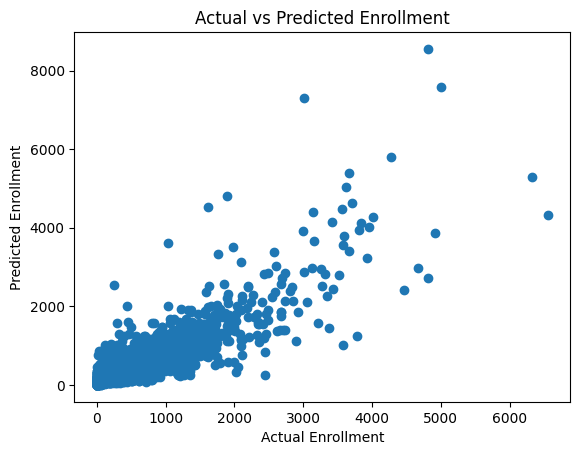

In [109]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(yy_test, y_model_pred)
plt.xlabel("Actual Enrollment")
plt.ylabel("Predicted Enrollment")
plt.title("Actual vs Predicted Enrollment")
plt.show()

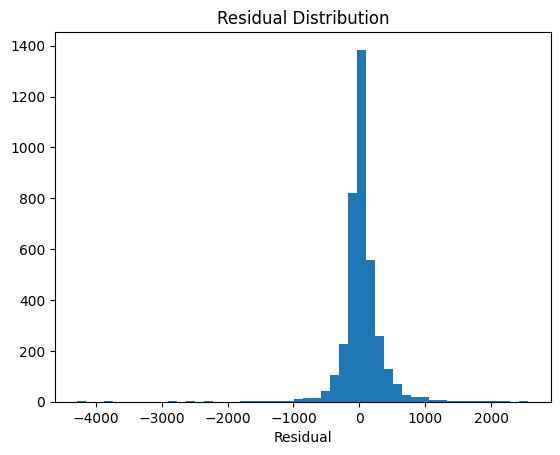

In [110]:
residuals = yy_test - y_model_pred

plt.figure()
plt.hist(residuals, bins=50)
plt.xlabel("Residual")
plt.title("Residual Distribution")
plt.show()

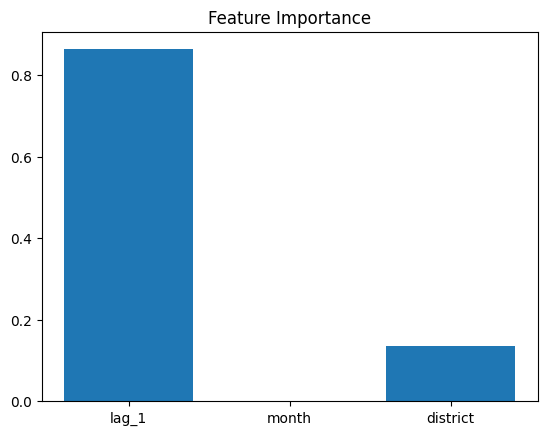

In [111]:
import numpy as np

features = ['lag_1', 'month', 'district']
importances = rf.feature_importances_

plt.figure()
plt.bar(features, importances)
plt.title("Feature Importance")
plt.show()

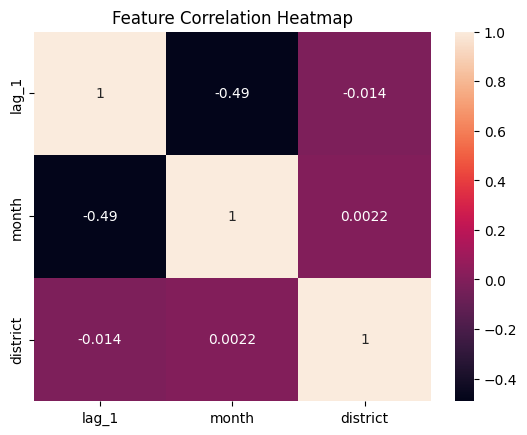

In [112]:
import seaborn as sns

plt.figure()
sns.heatmap(x_model.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

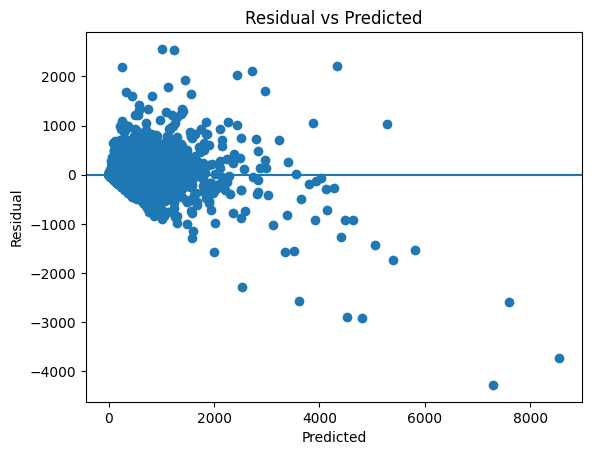

In [113]:
plt.figure()
plt.scatter(y_model_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual vs Predicted")
plt.show()

In [ ]:
import joblib

#joblib.dump(rf, "C:/Users/hp/Desktop/4th sem/AI_Training/Projects/Udaai_adhaar/models/rf_model.pkl")


['C:/Users/hp/Desktop/4th sem/AI_Training/Projects/Udaai_adhaar/models/rf_model.pkl']

In [116]:
joblib.dump(le, "C:/Users/hp/Desktop/4th sem/AI_Training/Projects/Udaai_adhaar/models/district_encoder.pkl")

['C:/Users/hp/Desktop/4th sem/AI_Training/Projects/Udaai_adhaar/models/district_encoder.pkl']

## model size 127 mb need to reduce to 100 mb (github limit)

In [135]:
from sklearn.ensemble import RandomForestRegressor

rf_new = RandomForestRegressor(
    n_estimators=50,     # reduce from 100
    max_depth=20,   # limit tree depth
    random_state=42,
    n_jobs=-1
)

rf_new.fit(xx_train, yy_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [136]:

joblib.dump(rf_new, "C:/Users/hp/Desktop/4th sem/AI_Training/Projects/Udaai_adhaar/models/rf_model_new.pkl")


['C:/Users/hp/Desktop/4th sem/AI_Training/Projects/Udaai_adhaar/models/rf_model_new.pkl']